In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [28]:
X, y = mnist["data"], mnist["target"]
print("X shape:", X.shape, "- y shape:", y.shape)

X shape: (70000, 784) - y shape: (70000,)


In [29]:
X.iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

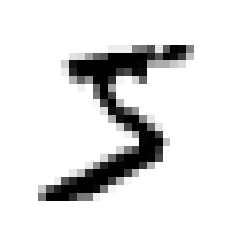

In [35]:
import matplotlib as mpl

some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [31]:
y[0]

'5'

In [32]:
# converting y from string to int
y = y.astype(np.uint8)
y[0]

5

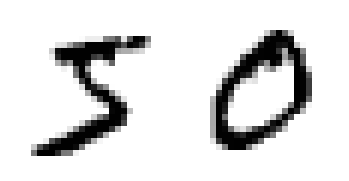

In [37]:
# My attempt at recreating image 3-1, showing some of the various images from the MNIST dataset with the intent 
# of demonstrating how complicated the classification task may be.

img1 = np.array(X.iloc[0]).reshape(28, 28)
img2 = np.array(X.iloc[1]).reshape(28, 28)

img_3 = np.concatenate((img1, img2), axis=1)
plt.axis("off")
plt.imshow(img_3, cmap="binary")

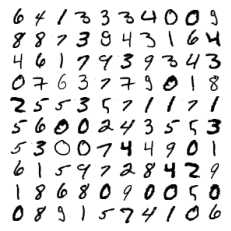

In [52]:
import random as rd

initialized = False
img_total = ''
images = []

for i in range(10):    
    for j in range(10):    
        img = np.array(X.iloc[j+int(100*rd.random())]).reshape(28, 28)
        if not initialized:
            img_total = img
            initialized = True
        else:
            img_total = np.concatenate((img_total, img), axis=1)
    images.append(img_total)
    img_total = ''
    initialized = False
   
full_img = images[0]
for img in images[1:]:
    full_img = np.concatenate((full_img, img), axis=0)

plt.axis("off")
plt.imshow(full_img, cmap="binary")



In [53]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [54]:
# Training just for the digit 5
y_train5 = (y_train == 5)
y_test5 = (y_test == 5)

In [55]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train5)

SGDClassifier(random_state=42)

In [60]:
sgd_clf.predict([some_digit])
print(sgd_clf.predict([X_train.iloc[9]])[0], y_train[9])

False 4


/home/arthurscarpatto/.local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/arthurscarpatto/.local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"
